# PCA

In [1]:
import cv2
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from barebones_ai.unsupervised.pca import PCA
%matplotlib inline 

/home/shyam/anaconda3/envs/py39/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Using PCA for image compression

### read in an image, extract red values

In [2]:
img = cv2.imread("data/Redfin_house.png")

In [3]:
X = img[:,:,2]

Dimensions:

In [4]:
print(X.shape)

(505, 798)


Histogram of X:

Text(0.5, 1.0, 'Reds')

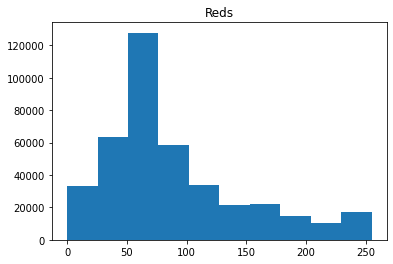

In [5]:
plt.hist(X.flatten())
plt.title('Reds')

### b)

In [6]:
def compute_covariance(X,col=True, correlation=False):
    '''
        computes covariance using definition (X - mean).dot(X-mean).T
        change col to True for (X - mean).T.dot(X-mean)
        change correlation to True for the correlation matrix
    '''
    if col is False:
        newx = ((X-X.mean(axis=1)).dot(X-X.mean(axis=1)).T)/X.shape[1]
    else:
        newx = ((X-X.mean(axis=0)).T.dot(X-X.mean(axis=0)))/X.shape[0]
    if correlation:
        stdev = np.diag(1/np.sqrt(np.diag(newx)))
        newx = stdev.dot(newx).dot(stdev)
    return newx

In [7]:
pca = PCA(X)

/home/shyam/anaconda3/envs/py39/lib/python3.9/site-packages/barebones_ai-0.1.2-py3.9.egg/barebones_ai/unsupervised/pca.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
/home/shyam/anaconda3/envs/py39/lib/python3.9/site-packages/barebones_ai-0.1.2-py3.9.egg/barebones_ai/unsupervised/pca.py:34: ComplexWarning: Casting complex values to real discards the imaginary part


Proportion of Variation Explained

<Figure size 432x288 with 0 Axes>

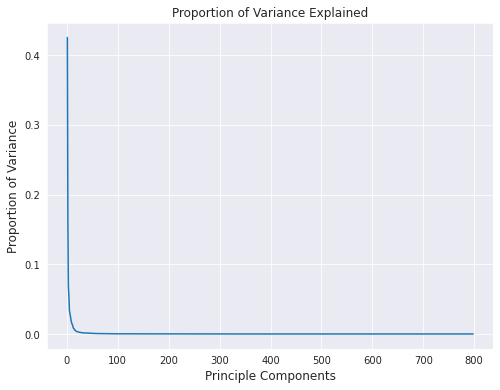

In [8]:
sns.set_style("darkgrid")
fig = plt.figure()
plt.figure(figsize=[8,6])
plt.plot(range(1,pca.proportion_variance.shape[0]+1),pca.proportion_variance)
plt.title('Proportion of Variance Explained')
plt.xlabel('Principle Components', fontsize=12)
plt.ylabel('Proportion of Variance', fontsize=12)
plt.show()

Cumulative Variance Explained

<Figure size 432x288 with 0 Axes>

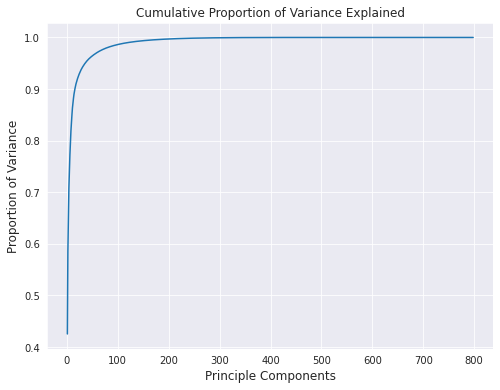

In [9]:
sns.set_style("darkgrid")
fig = plt.figure()
plt.figure(figsize=[8,6])
plt.plot(range(1,pca.cumulative_var.shape[0]+1),pca.cumulative_var)
plt.title('Cumulative Proportion of Variance Explained')
plt.xlabel('Principle Components', fontsize=12)
plt.ylabel('Proportion of Variance', fontsize=12)
plt.show()

In [10]:
ninety = np.where(pca.cumulative_var <= 0.902)[0]

In [11]:
number_of_pcs = max(ninety) + 1

Number of pcs that are needed to explain around 90% of the variance:

In [12]:
print("PCS: " + str(number_of_pcs))

PCS: 16


In [13]:
ds = np.array([1,5,10,15,20,30,50,100,200,798])  

In [14]:
def plot(i,ds):
    j = i*2
    fig.add_subplot((921 + j))
    plt.title("Projected with " + str(ds) + " PCs")
    plt.imshow(pca.rank(ds))

    fig.add_subplot((921 + j + 1))
    plt.title('Cumulative Proportion of Variance Explained with ' + str(ds) + ' PCs')
    if ds == 1:
        plt.plot([ds], [pca.cumulative_var[0]], marker='o', markersize=3, color="red")
    else:
        plt.plot(range(1,1+ds),pca.cumulative_var[:ds])

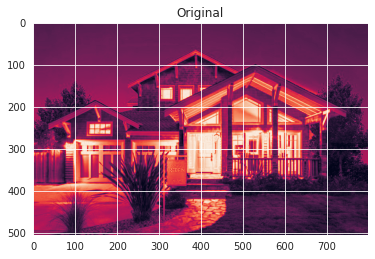

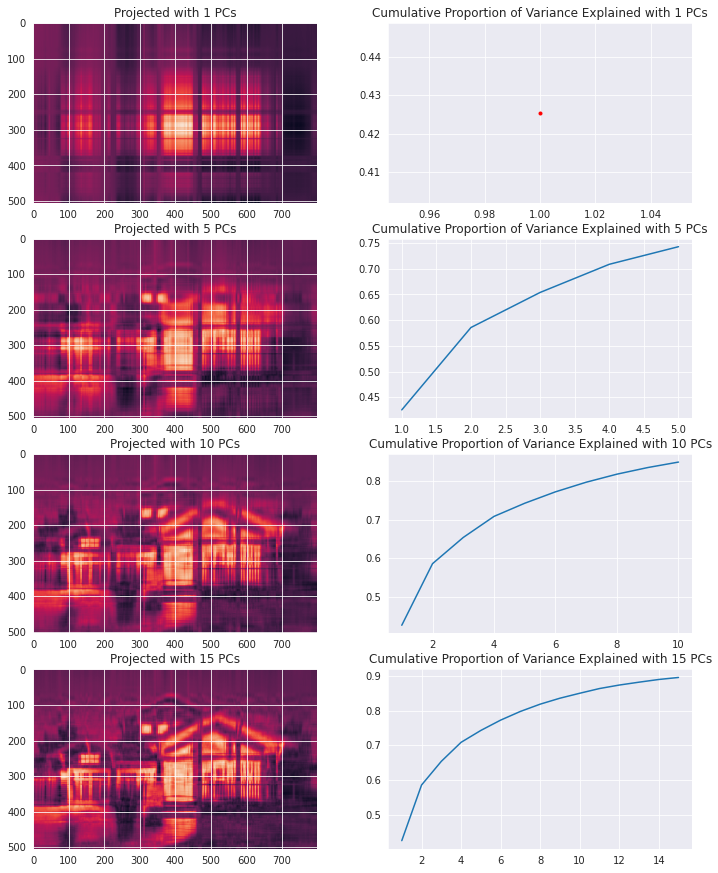

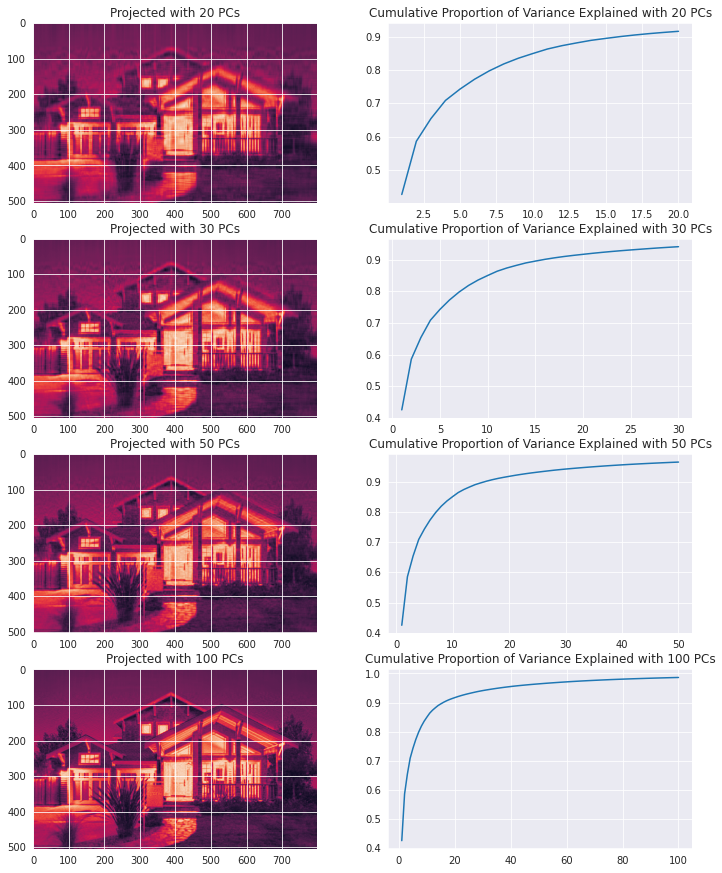

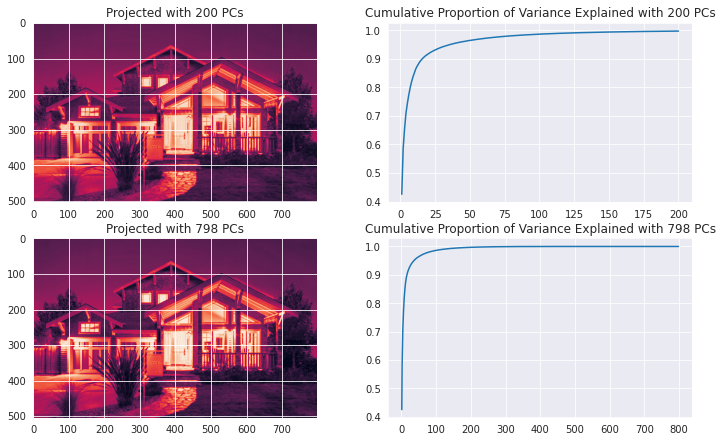

In [15]:
fig.add_subplot((921))
plt.title("Original")
plt.imshow(X)

fig = plt.figure()

fig.set_figheight(35)
fig.set_figwidth(12)

plot(0,ds[0])
plot(1,ds[1])
plot(2,ds[2])
plot(3,ds[3])

fig = plt.figure()

fig.set_figheight(35)
fig.set_figwidth(12)
plot(0,ds[4])
plot(1,ds[5])
plot(2,ds[6])
plot(3,ds[7])

fig = plt.figure()
fig.set_figheight(35)
fig.set_figwidth(12)
plot(0,ds[8])
plot(1,ds[9])